In [1]:
import datetime
import sys

sys.path.append("../nflpp")

import dataprep
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, plot_importance

In [2]:
pbp_data = dataprep.load_pbp_data(range(1999, 2024))

print(f"Play-by-play data shape: {pbp_data.shape}")

1999 done.
2000 done.
2001 done.
2002 done.
2003 done.
2004 done.
2005 done.
2006 done.
2007 done.
2008 done.
2009 done.
2010 done.
2011 done.
2012 done.
2013 done.
2014 done.
2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
Downcasting floats.
Play-by-play data shape: (1181343, 390)


In [3]:
processed_data = pbp_data[pbp_data["play_type"].isin(["run", "pass"])]

print(f"Run/pass filtered shape: {processed_data.shape}")

Run/pass filtered shape: (839562, 390)


In [5]:
processed_data.loc[:, "poscoach"] = processed_data.apply(
    lambda row: row["home_coach"]
    if row["posteam"] == row["home_team"]
    else row["away_coach"],
    axis=1,
)

print(f"Post-poscoach shape: {processed_data.shape}")

Post-poscoach shape: (839562, 391)


In [6]:
for column in ("posteam", "poscoach", "play_type"):
    processed_data.loc[:, column] = LabelEncoder().fit_transform(processed_data[column])

/tmp/ipykernel_84419/1199147313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_data[column] = LabelEncoder().fit_transform(processed_data[column])
/tmp/ipykernel_84419/1199147313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_data[column] = LabelEncoder().fit_transform(processed_data[column])
/tmp/ipykernel_84419/1199147313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [6]:
columns = [
    "drive",
    "qtr",
    "quarter_seconds_remaining",
    "down",
    "ydstogo",
    "yardline_100",
    "shotgun",
    "no_huddle",
    "score_differential",
    "spread_line",
    "season",
    "poscoach",
    "posteam",
]

clf = XGBClassifier()
clf.fit(train_data[columns].values, train_data["play_type"])
test_preds = clf.predict(test_data[columns].values)
accuracy = accuracy_score(test_data["play_type"], test_preds)
accuracy

0.7184871577758961

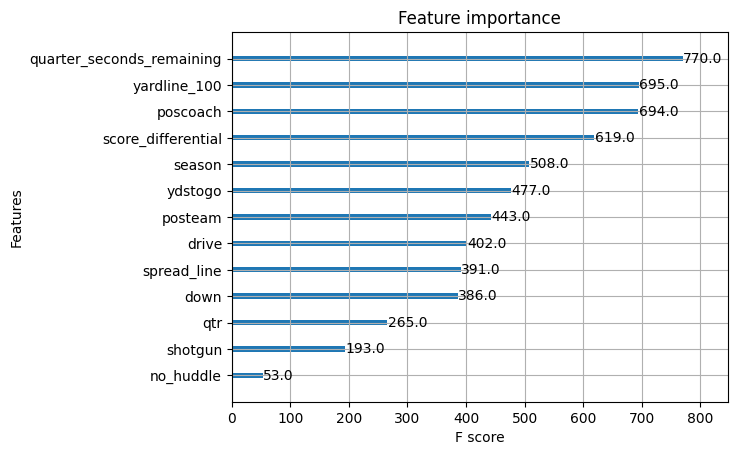

In [7]:
clf.get_booster().feature_names = columns

plot_importance(clf)
plt.show()

In [8]:
models_directory = "../models"

version = 3
timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
filename = f"{models_directory}/xgboost_v{version}_{timestamp}_{accuracy:.4f}.json"

clf.save_model(filename)